### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [3]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

In [5]:
df2.head()

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos_novos,obitos_novos
0,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-02,0,0
1,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-03,0,0
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,5,0
3,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-05,34,2
4,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-06,3,1


In [6]:
df2['ano_mes'].unique()

array(['2020-02', '2020-03', '2020-04', '2020-05', '2020-06'],
      dtype=object)

In [7]:
df2['nome_drs'].unique()

array(['Marília', 'São José do Rio Preto', 'São João da Boa Vista',
       'Bauru', 'Sorocaba', 'Presidente Prudente', 'Barretos',
       'Ribeirão Preto', 'Araçatuba', 'Campinas', 'Araraquara',
       'Piracicaba', 'Taubaté', 'Franca', 'Grande São Paulo', 'Registro',
       'Baixada Santista'], dtype=object)

## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

In [8]:
df2_reduzido = df2[df2['nome_drs'] != 'Grande São Paulo']

<AxesSubplot:title={'center':'Total de óbitos por DRS'}, xlabel='DRS', ylabel='No. óbitos'>

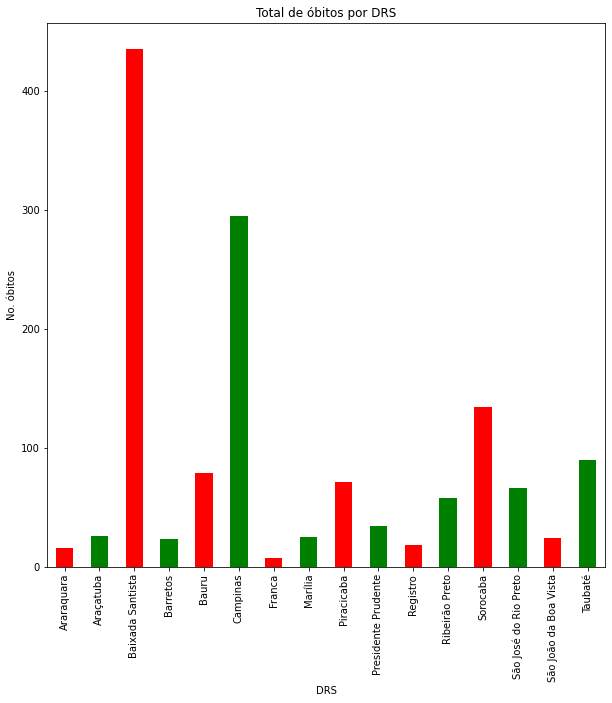

In [13]:
df2_reduzido.groupby(['nome_drs'])['obitos_novos'].sum().plot(kind='bar',
                                                              xlabel='DRS',
                                                              ylabel='No. óbitos', 
                                                              color=['red', 'green'],
                                                              title='Total de óbitos por DRS',
                                                              figsize=(10,10))

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

In [14]:
df2_reduzido['nome_drs'].unique()

array(['Marília', 'São José do Rio Preto', 'São João da Boa Vista',
       'Bauru', 'Sorocaba', 'Presidente Prudente', 'Barretos',
       'Ribeirão Preto', 'Araçatuba', 'Campinas', 'Araraquara',
       'Piracicaba', 'Taubaté', 'Franca', 'Registro', 'Baixada Santista'],
      dtype=object)

In [16]:
df2_cities = df2[(df2['nome_drs'] == 'Marília') |
                   (df2['nome_drs'] == 'Bauru') |
                   (df2['nome_drs'] == 'Ribeirão Preto')]
df2_mes = df2_cities[df2_cities['ano_mes'] == '2020-04']


<AxesSubplot:ylabel='DRS'>

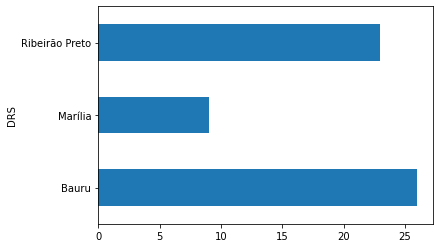

In [18]:
df2_mes.groupby(["nome_drs"])["obitos_novos"].sum().plot(kind="barh", xlabel='DRS', ylabel='No. óbitos')

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

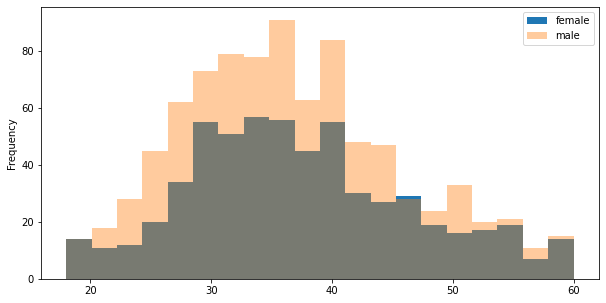

In [10]:
ax1 = df1[df1['Gender']=='Female'].plot(y='Age', kind='hist', bins=20, figsize=(10,5), label='female')
ax2 = df1[df1['Gender']=='Male'].plot(y='Age', kind='hist', bins=20, figsize=(10,5), alpha=0.4, label='male', ax=ax1)

**b)** Faça agora um boxplot das idades, por gênero.

<AxesSubplot:title={'center':'Age'}, xlabel='Gender'>

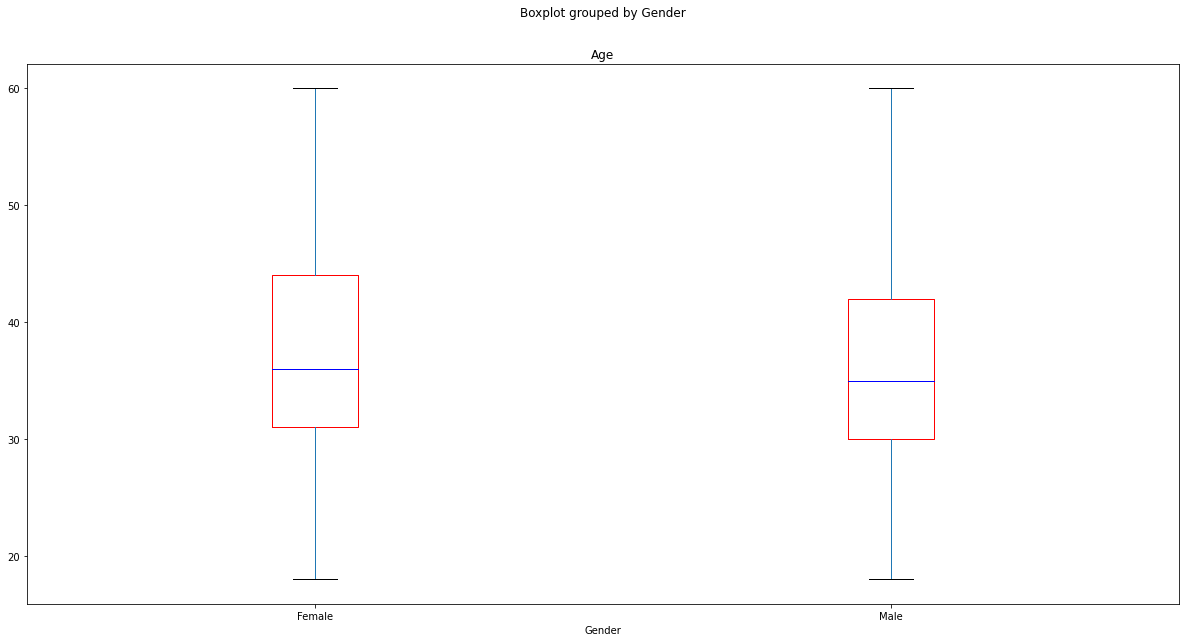

In [17]:
df1.boxplot(column='Age', by='Gender', grid=False,
         color={'boxes':'red', 'medians' : 'blue'}, figsize=(20,10))